## _*H2 plot with different basis sets used*_

This notebook demonstrates using Qiskit Chemistry to plot graphs of the ground state energy of the Hydrogen (H2) molecule over a range of inter-atomic distances in different basis sets.

This notebook has been written to use the PSI4 chemistry driver. See the PSI4 chemistry driver readme if you need to install the external Psi4 program that this driver requires.

In [1]:
import numpy as np
import pylab
from qiskit.chemistry.drivers import PSI4Driver
from qiskit.aqua.algorithms import ExactEigensolver
from qiskit.chemistry.core import Hamiltonian

# PSI4 config here is a multi-line string that we update using format()
# To do so all other curly brackets that are required in the PSI4 config must be doubled
psi4_cfg = """
molecule h2 {{
   0 1
   H 0.0 0.0 -{0}
   H 0.0 0.0 {0}
}}

set {{
  basis {1}
  scf_type pk
}}
"""
basis_sets = ['sto-3g', '3-21g', '6-31g']
start = 0.5  # Start distance
by    = 0.5  # How much to increase distance by
steps = 20   # Number of steps to increase by
energies  = np.empty([len(basis_sets), steps+1])
distances = np.empty(steps+1)

print('Processing step __', end='')
for i in range(steps+1):
    print('\b\b{:2d}'.format(i), end='', flush=True)
    d = start + i*by/steps
    for j in range(len(basis_sets)):
        driver = PSI4Driver(psi4_cfg.format(d/2, basis_sets[j]))
        qmolecule = driver.run()
        operator =  Hamiltonian()
        qubit_op, aux_ops = operator.run(qmolecule)
        result = ExactEigensolver(qubit_op).run()
        lines, result = operator.process_algorithm_result(result)
        energies[j][i] = result['energy']
    distances[i] = d
print(' --- complete')

print('Distances: ', distances)
print('Energies:', energies)

Couldn't find cython int routine
Couldn't find cython int routine
Processing step 20 --- complete
Distances:  [0.5   0.525 0.55  0.575 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775
 0.8   0.825 0.85  0.875 0.9   0.925 0.95  0.975 1.   ]
Energies: [[-1.05515979 -1.07591366 -1.09262991 -1.10591805 -1.11628601 -1.12416092
  -1.12990478 -1.13382622 -1.13618945 -1.13722138 -1.13711707 -1.13604436
  -1.13414767 -1.13155121 -1.12836188 -1.12467175 -1.12056028 -1.11609624
  -1.11133942 -1.10634211 -1.10115033]
 [-1.07121344 -1.09011427 -1.10532121 -1.11742954 -1.12693056 -1.13423167
  -1.13967222 -1.14353615 -1.14606218 -1.14745209 -1.14787738 -1.14748463
  -1.14639978 -1.14473155 -1.14257409 -1.14000911 -1.13710763 -1.13393134
  -1.13053375 -1.12696114 -1.1232535 ]
 [-1.0778639  -1.09627049 -1.111046   -1.12277894 -1.13195346 -1.13897049
  -1.14416409 -1.14781424 -1.15015683 -1.15139164 -1.15168855 -1.15119257
  -1.15002788 -1.14830105 -1.14610373 -1.14351485 -1.14060245 -1.13742526
  -1.13

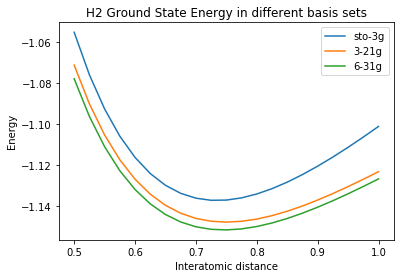

In [2]:
for j in range(len(basis_sets)):
    pylab.plot(distances, energies[j], label=basis_sets[j])
pylab.xlabel('Interatomic distance')
pylab.ylabel('Energy')
pylab.title('H2 Ground State Energy in different basis sets')
pylab.legend(loc='upper right');